In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms
import torch

In [2]:
# Paths
DATASET_PATH = 'C:\\Users\\thanh-dung.le\\Documents\\EuroSat_Satellite\\EuroSAT_RGB'
TEST_PATH = os.path.join(DATASET_PATH, 'test')

# Create output directories for different severity levels
output_dir = './noisy_test_data/data_gaussian'
severity_levels = [1, 2, 3, 4, 5]

for severity in severity_levels:
    for class_name in os.listdir(TEST_PATH):
        os.makedirs(os.path.join(output_dir, f'severity_{severity}', class_name), exist_ok=True)

# Data transformation
data_transforms = transforms.Compose([
    transforms.Resize(64),  
    transforms.ToTensor(),
])

# Load the test dataset
test_dataset = datasets.ImageFolder(TEST_PATH, data_transforms)

def add_gaussian_noise(image_tensor, severity):
    """
    Add Gaussian noise to an image tensor with a given severity level.
    Severity: 1 to 5, where 1 is the least noise and 5 is the most.
    """
    noisy_image = image_tensor.clone()
    num_channels, height, width = noisy_image.shape
    
    # Define the standard deviation of the Gaussian noise based on severity
    std = severity * 0.01  # Reduced the factor to make noise less severe
    
    # Generate Gaussian noise
    noise = torch.randn_like(noisy_image) * std
    
    # Add the Gaussian noise to the image
    noisy_image += noise
    
    # Clip the values to [0, 1] range
    noisy_image = torch.clamp(noisy_image, 0.0, 1.0)
    
    return noisy_image

# Process and save noisy images
for idx, (image, label) in enumerate(test_dataset):
    for severity in severity_levels:
        # Add noise to the image
        noisy_image = add_gaussian_noise(image, severity)
        
        # Convert the tensor back to a PIL image
        noisy_image_pil = transforms.ToPILImage()(noisy_image)
        
        # Save the noisy image
        class_dir = test_dataset.classes[label]
        output_path = os.path.join(output_dir, f'severity_{severity}', class_dir)
        os.makedirs(output_path, exist_ok=True)
        noisy_image_pil.save(os.path.join(output_path, f'{idx}.png'))

print('Noisy test datasets with shot noise created successfully.')

Noisy test datasets with shot noise created successfully.


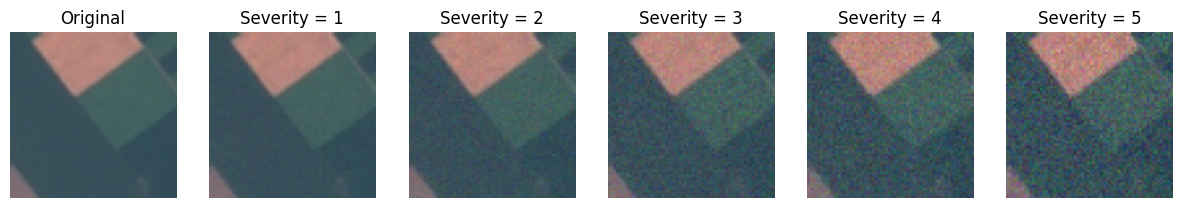

In [4]:
# Show comparison of the original image and noisy images
def show_comparison(idx):
    fig, axes = plt.subplots(1, 6, figsize=(15, 5))
    
    original_image, label = test_dataset[idx]
    original_image_pil = transforms.ToPILImage()(original_image)
    
    axes[0].imshow(original_image_pil)
    axes[0].set_title("Original")
    axes[0].axis('off')
    
    for i, severity in enumerate(severity_levels, 1):
        noisy_image = add_gaussian_noise(original_image, severity)
        noisy_image_pil = transforms.ToPILImage()(noisy_image)
        
        axes[i].imshow(noisy_image_pil)
        axes[i].set_title(f"Severity = {severity}")
        axes[i].axis('off')
    
    plt.show()

# Show comparison for the first image in the test dataset
show_comparison(0)